### MNIST 필기 숫자 데이터셋 및 CIFAR-10 자연 영상 데이터셋 확인

In [1]:
import tensorflow as ft
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train),(X_test, y_test) = ds.mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize=30)

Text(0.5, 0.98, 'MNIST')

<Figure size 2400x300 with 0 Axes>

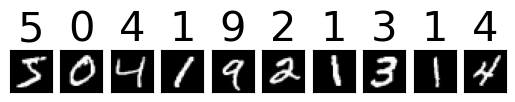

In [7]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]), fontsize=30)

In [8]:
(X_train, y_train),(X_test, y_test) = ds.cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 48s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [10]:
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10', fontsize=30)

Text(0.5, 0.98, 'CIFAR-10')

<Figure size 2400x300 with 0 Axes>

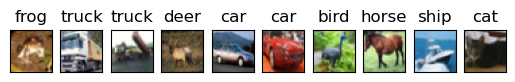

In [12]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[y_train[i,0]])

### 필기 숫자 인식
#### 다층 퍼셉트론으로 MNIST 인식하기 (SGD 옵티마이저)

In [47]:
import numpy as np
import tensorflow as ft
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [48]:
(X_train,y_train),(X_test,y_test)=ds.mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [49]:
# 2차원 데이터 28*28을 Dense에 입력하기 위해서 1차원화
#이후에 컬러값 255를 전체적으로 나누어서 표준화
#파이썬에서는 정수/정수 는 정수로 나오기때문에 x값을 실수로 변경해서 결과값도 실수로 나오게 (데이터 손실 최소화)
X_train = X_train.reshape(-1, 784).astype('float64')/255.0
X_test = X_test.reshape(-1, 784).astype('float64')/255.0

#원핫인코딩을 위해서 keras의 to_categorical사용, Mnist에서는 클래스가 10개라서 10 입력
y_train = ft.keras.utils.to_categorical(y_train, 10)
y_test = ft.keras.utils.to_categorical(y_test, 10)


In [50]:
#모델 구조 정의
mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

In [ ]:
#모델 컴파일
mlp.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [52]:
mlp.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
469/469 - 66s - loss: 0.0906 - accuracy: 0.1258 - val_loss: 0.0871 - val_accuracy: 0.2325 - 66s/epoch - 140ms/step
Epoch 2/50
469/469 - 5s - loss: 0.0838 - accuracy: 0.3108 - val_loss: 0.0802 - val_accuracy: 0.3949 - 5s/epoch - 11ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0769 - accuracy: 0.4632 - val_loss: 0.0730 - val_accuracy: 0.5443 - 5s/epoch - 11ms/step
Epoch 4/50
469/469 - 5s - loss: 0.0696 - accuracy: 0.5846 - val_loss: 0.0655 - val_accuracy: 0.6327 - 5s/epoch - 11ms/step
Epoch 5/50
469/469 - 5s - loss: 0.0624 - accuracy: 0.6511 - val_loss: 0.0586 - val_accuracy: 0.6810 - 5s/epoch - 11ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0563 - accuracy: 0.6881 - val_loss: 0.0529 - val_accuracy: 0.7134 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0513 - accuracy: 0.7156 - val_loss: 0.0484 - val_accuracy: 0.7379 - 5s/epoch - 11ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0473 - accuracy: 0.7359 - val_loss: 0.0447 - val_accuracy: 0.7552 - 5s/epoch - 11ms/step
Epoch 9/50
46

In [53]:
res = mlp.evaluate(X_test, y_test, verbose=0)
print('정확률 = ', res[1]*100)

정확률 =  89.78000283241272


### Adam 옵티마이저를 사용하여 성능 향상

In [66]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [67]:
(X_train, y_train), (X_test, y_test) = ds.mnist.load_data()

In [68]:
X_train = X_train.reshape(-1, 784).astype('float64')/255.0
X_test = X_test.reshape(-1,784).astype('float64')/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [69]:
mlp=Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

In [70]:
mlp.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [71]:
mlp.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_test,y_test),verbose=2)

Epoch 1/50
469/469 - 8s - loss: 0.0148 - accuracy: 0.9024 - val_loss: 0.0100 - val_accuracy: 0.9353 - 8s/epoch - 18ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0088 - accuracy: 0.9437 - val_loss: 0.0076 - val_accuracy: 0.9501 - 6s/epoch - 12ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0064 - accuracy: 0.9590 - val_loss: 0.0060 - val_accuracy: 0.9612 - 6s/epoch - 12ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0050 - accuracy: 0.9686 - val_loss: 0.0051 - val_accuracy: 0.9685 - 6s/epoch - 12ms/step
Epoch 5/50
469/469 - 6s - loss: 0.0040 - accuracy: 0.9753 - val_loss: 0.0047 - val_accuracy: 0.9692 - 6s/epoch - 12ms/step
Epoch 6/50
469/469 - 6s - loss: 0.0033 - accuracy: 0.9801 - val_loss: 0.0044 - val_accuracy: 0.9707 - 6s/epoch - 12ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0027 - accuracy: 0.9841 - val_loss: 0.0039 - val_accuracy: 0.9749 - 5s/epoch - 10ms/step
Epoch 8/50
469/469 - 6s - loss: 0.0023 - accuracy: 0.9866 - val_loss: 0.0041 - val_accuracy: 0.9725 - 6s/epoch - 12ms/step
Epoch 9/50
469/4

In [72]:
res = mlp.evaluate(X_test, y_test, verbose=0)
print('정확률 = ', res[1]*100)

정확률 =  98.03000092506409


### 성능 시각화
#### SGD와 Adam성능을 그래프로 비교

In [73]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

In [83]:
(X_train, y_train), (X_test, y_test) = ds.mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
X_train = X_train.reshape(-1, 784).astype('float64')/255
X_test = X_test.reshape(-1, 784).astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [86]:
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))

In [87]:
mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [88]:
hist_sgd = mlp_sgd.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test,y_test),verbose=2)

Epoch 1/50
469/469 - 7s - loss: 0.0908 - accuracy: 0.1188 - val_loss: 0.0879 - val_accuracy: 0.2158 - 7s/epoch - 15ms/step
Epoch 2/50
469/469 - 5s - loss: 0.0850 - accuracy: 0.3178 - val_loss: 0.0811 - val_accuracy: 0.4089 - 5s/epoch - 11ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0777 - accuracy: 0.4423 - val_loss: 0.0734 - val_accuracy: 0.4898 - 5s/epoch - 11ms/step
Epoch 4/50
469/469 - 5s - loss: 0.0703 - accuracy: 0.5163 - val_loss: 0.0661 - val_accuracy: 0.5727 - 5s/epoch - 11ms/step
Epoch 5/50
469/469 - 5s - loss: 0.0635 - accuracy: 0.6015 - val_loss: 0.0595 - val_accuracy: 0.6536 - 5s/epoch - 11ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0574 - accuracy: 0.6719 - val_loss: 0.0537 - val_accuracy: 0.7086 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0522 - accuracy: 0.7131 - val_loss: 0.0488 - val_accuracy: 0.7392 - 5s/epoch - 11ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0478 - accuracy: 0.7396 - val_loss: 0.0448 - val_accuracy: 0.7591 - 5s/epoch - 11ms/step
Epoch 9/50
469/4

In [89]:
print('SGD정확률 : ', mlp_sgd.evaluate(X_test, y_test, verbose=0)[1]*100)

SGD정확률 :  89.55000042915344


In [90]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

In [95]:
mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [96]:
hist_adam=mlp_adam.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_test,y_test),verbose=2)

Epoch 1/50
469/469 - 8s - loss: 0.0146 - accuracy: 0.9033 - val_loss: 0.0103 - val_accuracy: 0.9341 - 8s/epoch - 17ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0089 - accuracy: 0.9428 - val_loss: 0.0077 - val_accuracy: 0.9512 - 6s/epoch - 13ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0066 - accuracy: 0.9579 - val_loss: 0.0059 - val_accuracy: 0.9612 - 6s/epoch - 13ms/step
Epoch 4/50
469/469 - 7s - loss: 0.0051 - accuracy: 0.9688 - val_loss: 0.0051 - val_accuracy: 0.9683 - 7s/epoch - 14ms/step
Epoch 5/50
469/469 - 6s - loss: 0.0041 - accuracy: 0.9753 - val_loss: 0.0046 - val_accuracy: 0.9696 - 6s/epoch - 13ms/step
Epoch 6/50
469/469 - 6s - loss: 0.0034 - accuracy: 0.9797 - val_loss: 0.0043 - val_accuracy: 0.9716 - 6s/epoch - 13ms/step
Epoch 7/50
469/469 - 6s - loss: 0.0029 - accuracy: 0.9829 - val_loss: 0.0041 - val_accuracy: 0.9732 - 6s/epoch - 14ms/step
Epoch 8/50
469/469 - 6s - loss: 0.0024 - accuracy: 0.9862 - val_loss: 0.0035 - val_accuracy: 0.9765 - 6s/epoch - 14ms/step
Epoch 9/50
469/4

In [97]:
print('Adam 정확률 : ', mlp_adam.evaluate(X_test, y_test, verbose=0)[1]*100)

Adam 정확률 :  98.11999797821045


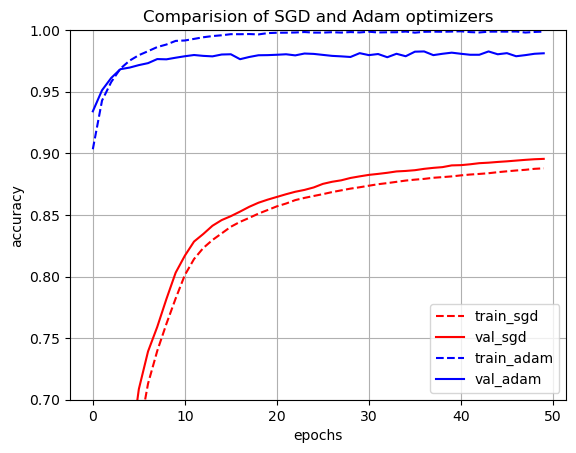

In [98]:
import matplotlib.pyplot as plt
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparision of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid('--')
plt.show()

### 파이퍼 파라미터 다루기
#### 깊은 다층 퍼셉트론으로 MNIST 인식

In [99]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

In [107]:
(X_train, y_train), (X_test, y_test) = ds.mnist.load_data()
print(X_train.shape, X_test.shape)

X_train = X_train.reshape(-1, 784).astype('float64')/255
X_test = X_test.reshape(-1, 784).astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(60000, 28, 28) (10000, 28, 28)


In [108]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

In [113]:
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [114]:
hist_dmlp = dmlp.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
469/469 - 3s - loss: 0.1997 - accuracy: 0.9389 - val_loss: 0.0969 - val_accuracy: 0.9694 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0841 - val_accuracy: 0.9731 - 2s/epoch - 5ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0538 - accuracy: 0.9830 - val_loss: 0.0959 - val_accuracy: 0.9727 - 2s/epoch - 5ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0829 - val_accuracy: 0.9772 - 2s/epoch - 5ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0964 - val_accuracy: 0.9720 - 2s/epoch - 5ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0702 - val_accuracy: 0.9816 - 2s/epoch - 5ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0823 - val_accuracy: 0.9789 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0882 - val_accuracy: 0.9795 - 2s/epoch - 5ms/step
Epoch 9/50
469/469 - 2s 

In [116]:
print('정확률 : ', dmlp.evaluate(X_test, y_test, verbose=0)[1]*100)

정확률 :  98.089998960495


In [117]:
dmlp.save('dmlp_trained,h5')

INFO:tensorflow:Assets written to: dmlp_trained,h5\assets


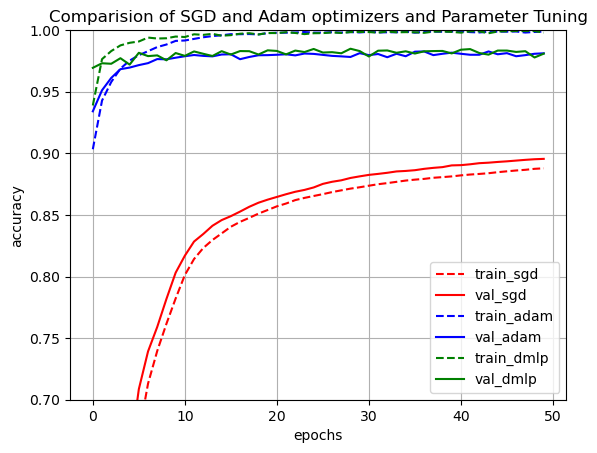

In [119]:
import matplotlib.pyplot as plt
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.plot(hist_dmlp.history['accuracy'], 'g--')
plt.plot(hist_dmlp.history['val_accuracy'], 'g')
plt.title('Comparision of SGD and Adam optimizers and Parameter Tuning')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam', 'train_dmlp', 'val_dmlp'])
plt.grid('--')
plt.show()

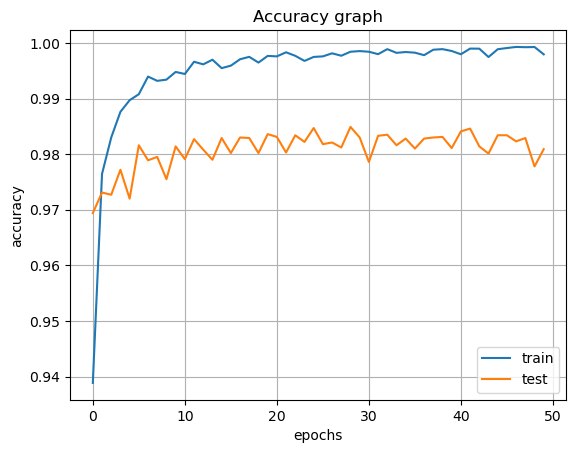

In [120]:
plt.plot(hist_dmlp.history['accuracy'])
plt.plot(hist_dmlp.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

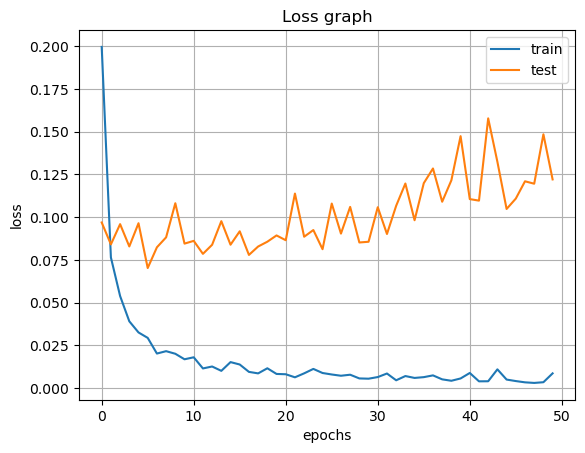

In [121]:
plt.plot(hist_dmlp.history['loss'])
plt.plot(hist_dmlp.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()